In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
color = sns.color_palette()
pd.options.display.max_columns = None

In [2]:
data_path = '/project/data/users.csv'
data = pd.read_csv(data_path)
data.drop(['ClientId'], axis=1, inplace=True)
data['NonSoccer'] = 100 - data['Soccer']
print(data.shape)
data.head(30)

(40394, 23)


NewUser  OldUser  Single  Express    Live  Prematch  Soccer  \
0         0        1   99.48     0.52   99.34      0.66   99.57   
1         0        1   90.10     9.90   11.88     88.12   92.08   
2         1        0    0.00   100.00    0.00    100.00   75.00   
3         0        1   75.00    25.00   83.33     16.67  100.00   
4         0        1   55.09    44.91   97.38      2.62   94.67   
5         0        1   74.07    25.93   96.30      3.70   96.30   
6         0        1   22.43    77.57   60.59     39.41   81.35   
7         0        1   36.92    63.08   50.77     49.23   16.67   
8         0        1   36.36    63.64   18.18     81.82  100.00   
9         1        0  100.00     0.00  100.00      0.00  100.00   
10        1        0   10.05    89.95   89.77     10.23   98.56   
11        1        0   71.58    28.42   86.89     13.11   92.37   
12        0        1   15.85    84.15   74.86     25.14   88.00   
13        1        0   34.56    65.44   94.37      5.63   99.82   
14        1        0   50.00    50.00    0.00    100.00   50.00   
15        0        1   84.33    15.67   98.21      1.79   92.20   
16        0        1   29.17    70.83   47.92     52.08  100.00   
17        0        1   26.44    73.56   65.08     34.92   52.91   
18        1        0   67.35    32.65   73.47     26.53   91.84   
19        1        0   42.19    57.81   66.96     33.04   90.47   
20        1        0    0.00   100.00  100.00      0.00  100.00   
21        1        0   88.24    11.76  100.00      0.00    5.88   
22        1        0   22.22    77.78   94.44      5.56  100.00   
23        0        1  100.00     0.00    0.00    100.00  100.00   
24        0        1    0.00   100.00  100.00      0.00  100.00   
25        1        0   87.50    12.50    3.13     96.88   60.42   
26        0        1   73.81    26.19  100.00      0.00   29.79   
27        1        0    0.00   100.00  100.00      0.00  100.00   
28        1        0  100.00     0.00    0.00    100.00    0.00   
29        1        0   85.70    14.30   80.08     19.92   48.20   

    VirtualFootball  CyberFootball  Basketball  Tennis  TableTennis  \
0              0.00           0.09        0.35    0.00         0.00   
1              0.00           0.00        6.93    0.00         0.00   
2              0.00           0.00        6.25    6.25         0.00   
3              0.00           0.00        0.00    0.00         0.00   
4              0.00           0.00        1.37    0.00         0.00   
5              0.00           0.00        3.70    0.00         0.00   
6              0.00           0.00       17.83    0.00         0.00   
7             40.91           0.00       42.42    0.00         0.00   
8              0.00           0.00        0.00    0.00         0.00   
9              0.00           0.00        0.00    0.00         0.00   
10             0.00           0.00        1.44    0.00         0.00   
11             0.00           0.27        7.36    0.00         0.00   
12             0.00           0.00       10.67    0.00         0.00   
13             0.00           0.09        0.00    0.00         0.00   
14             0.00           0.00       50.00    0.00         0.00   
15             0.00           0.00        0.74    1.00         0.47   
16             0.00           0.00        0.00    0.00         0.00   
17             0.00           0.00       46.79    0.31         0.00   
18             0.00           0.00        8.16    0.00         0.00   
19             0.00           0.00        9.53    0.00         0.00   
20             0.00           0.00        0.00    0.00         0.00   
21             0.00           0.00        0.00    0.00         0.00   
22             0.00           0.00        0.00    0.00         0.00   
23             0.00           0.00        0.00    0.00         0.00   
24             0.00           0.00        0.00    0.00         0.00   
25             0.00           0.00       37.50    0.00         0.00   
26       

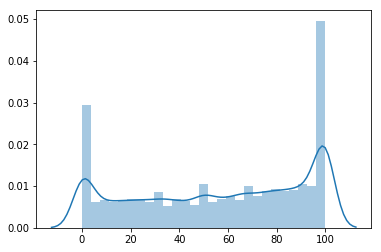

In [3]:
filtered = data.copy()
X = filtered[['Single']].values
sns.distplot(X);

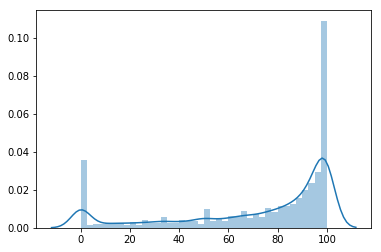

In [4]:
filtered = data.copy()
X = filtered[['Live']].values
sns.distplot(X);

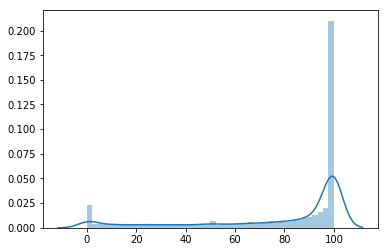

In [5]:
filtered = data.copy()
X = filtered[['Soccer']].values
sns.distplot(X);

In [6]:
pair_type = [['Single', 'Express'], ['Live', 'Prematch'], ['Soccer', 'NonSoccer']]
# pair_type = [['Soccer', 'NonSoccer']]
for _type in pair_type:
    to_db = data.copy()
    to_db = data[_type]
    to_db = to_db.values
    eps = 0.3
    min_samples = 100
    db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1).fit(to_db)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print('Type of features are {}'.format('_and_'.join(_type)))
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print('Noise precent: %s' % (n_noise_ / to_db.shape[0] * 100))
    
    clusters = list(set(labels) - set([-1]))
    top_clusters = []
    for cls in clusters:
        top_clusters.append(np.sum(labels == cls) / len(labels) * 100)
    top_clusters = np.array(top_clusters)
    top_clusters = np.argsort(top_clusters)[::-1][:3]
    if _type[0] == 'Soccer':
        top_clusters = top_clusters[:2]
    for cls in top_clusters:
        filtered = list(labels == cls)
        df = data[_type[:1]][filtered]
        print('For cluster {} mean of feature'
              ' {} is {} amount of users is {}'.format(cls, 
                                                    _type[:1][0], 
                                                    np.mean(df.values), 
                                                       np.sum(filtered)))
    
    print('\n')

Type of features are Single_and_Express
Estimated number of clusters: 53
Estimated number of noise points: 1203
Noise precent: 2.978165074020894
For cluster 0 mean of feature Single is 89.65009925835052 amount of users is 17933
For cluster 1 mean of feature Single is 0.0030527165142549754 amount of users is 3718
For cluster 7 mean of feature Single is 63.75856555846096 amount of users is 2677


Type of features are Live_and_Prematch
Estimated number of clusters: 28
Estimated number of noise points: 5358
Noise precent: 13.264346190028222
For cluster 0 mean of feature Live is 93.35206523867329 amount of users is 25537
For cluster 1 mean of feature Live is 4.7752808988764046e-05 amount of users is 3560
For cluster 4 mean of feature Live is 50.001222929936304 amount of users is 785


Type of features are Soccer_and_NonSoccer
Estimated number of clusters: 21
Estimated number of noise points: 8491
Noise precent: 21.020448581472493
For cluster 0 mean of feature Soccer is 97.54834425276215 amo